**Problem 1**

Let f(x)=2sinx−cos2x. Write a function beauty_derivative_plot that takes a point x and plots the function f(x) and its derivative f′(x) in the range x∈[−2π,2π]. The function should also plot the tangent line to the function at the point x.

Example of output for x=−3,−2,1.7:

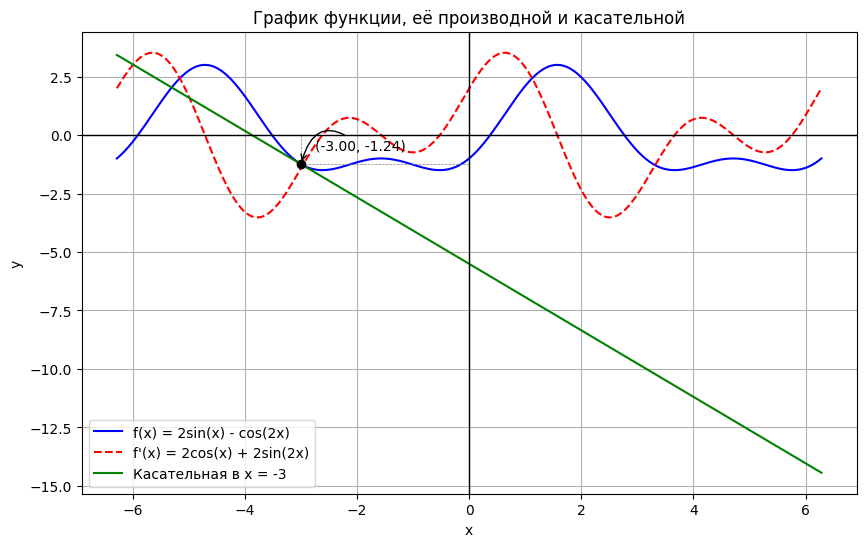

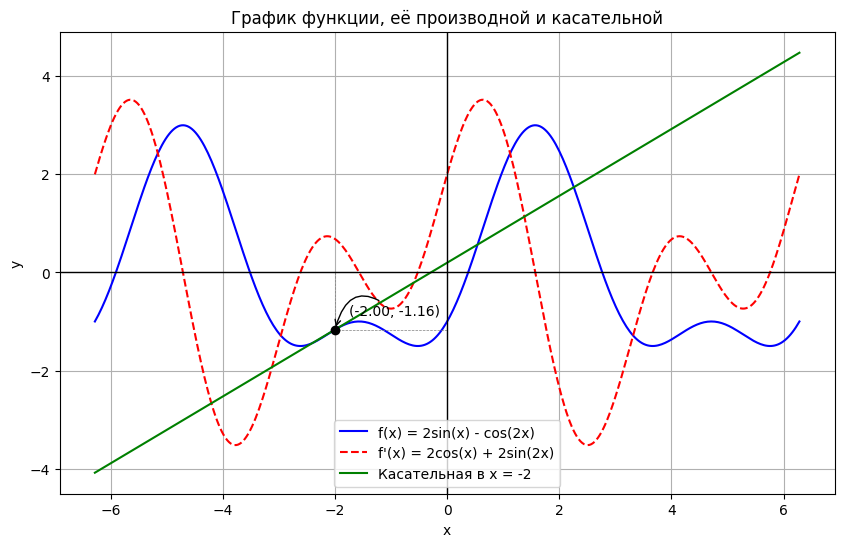

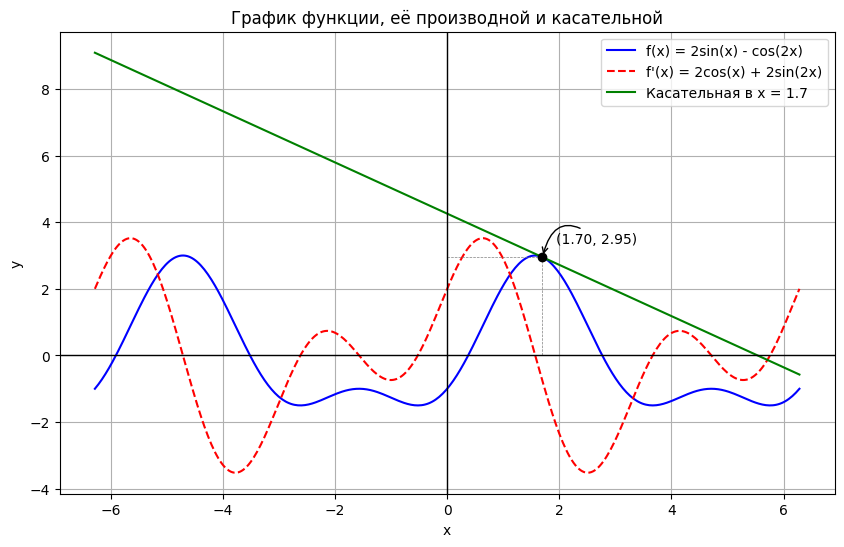

In [1]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return 2*np.sin(x) - np.cos(2*x)

def f_derivative(x):
    return 2*np.cos(x) + 2*np.sin(2*x)

def beauty_derivative_plot(x0):

    x = np.linspace(-2*np.pi, 2*np.pi, 400)

    y_f = f(x)
    y_f_derivative = f_derivative(x)

    f_x0 = f(x0)
    f_derivative_x0 = f_derivative(x0)

    # уравнение касательной
    tangent_line = f_x0 + f_derivative_x0*(x - x0)

    # размер рисунка
    plt.figure(figsize=(10, 6))

    plt.plot(x, y_f, label="f(x) = 2sin(x) - cos(2x)", color='blue')
    plt.plot(x, y_f_derivative, label="f'(x) = 2cos(x) + 2sin(2x)", color='red', linestyle='--')
    plt.plot(x, tangent_line, label=f"Касательная в x = {x0}", color='green')

    plt.scatter([x0], [f_x0], color='black', zorder=5)
    # подпись с координатами точки касания
    plt.annotate(f"({x0:.2f}, {f_x0:.2f})", xy=(x0, f_x0), xycoords='data',
                 xytext=(10, 10), textcoords='offset points', fontsize=10,
                 arrowprops=dict(arrowstyle="->", connectionstyle="arc3,rad=0.8"))

    # проекции точки касания на оси
    plt.plot([x0, x0], [0, f_x0], linestyle='--', color='gray', linewidth=0.5)
    plt.plot([0, x0], [f_x0, f_x0], linestyle='--', color='gray', linewidth=0.5)

    # координатные оси
    plt.axhline(0, color='black', linewidth=1)
    plt.axvline(0, color='black', linewidth=1)

    plt.title(f"График функции, её производной и касательной")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.legend()
    plt.grid(True)

    plt.show()

# примеры
beauty_derivative_plot(-3)
beauty_derivative_plot(-2)
beauty_derivative_plot(1.7)

##Problem 2

The data in populations.txt describes the populations of hares, lynxes and carrots in northern Canada during 20 years. Do the following exercises without for-loops.

1)Plot the population size of each species for each year on a single graph. Add legend and axis labels to the plot.

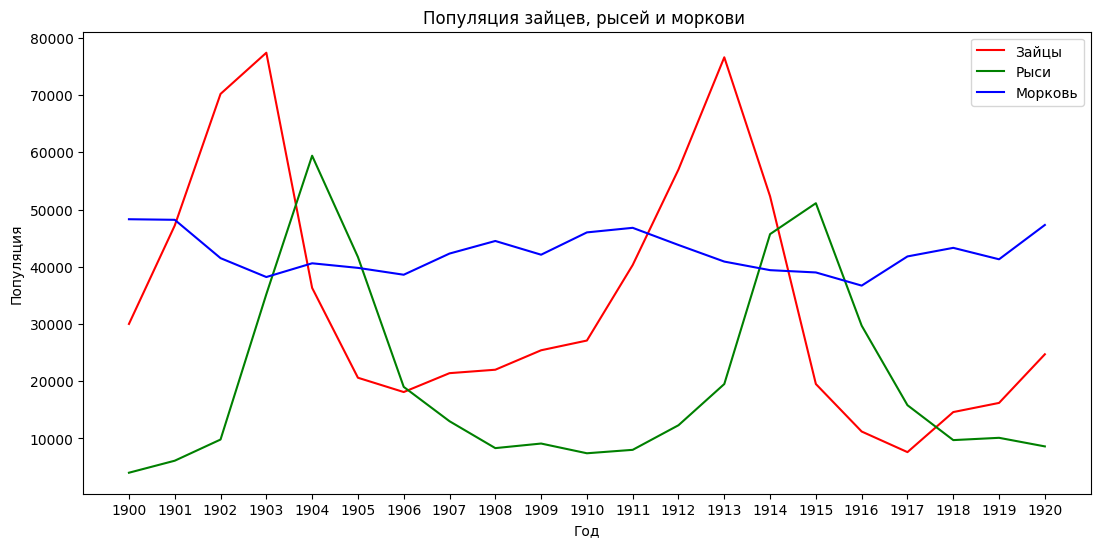

In [2]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('populations.txt', skiprows=1)

years = data[:, 0]
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

plt.figure(figsize = (13, 6))
plt.xticks(years.astype(int))

plt.plot(years, hares, label='Зайцы', color='r')
plt.plot(years, lynxes, label='Рыси', color='g')
plt.plot(years, carrots, label='Морковь', color='b')

plt.legend()
plt.xlabel('Год')
plt.ylabel('Популяция')
plt.title('Популяция зайцев, рысей и моркови ')

plt.show()

2)Find which year each species had the largest population. Mark these years in the plot of populations.

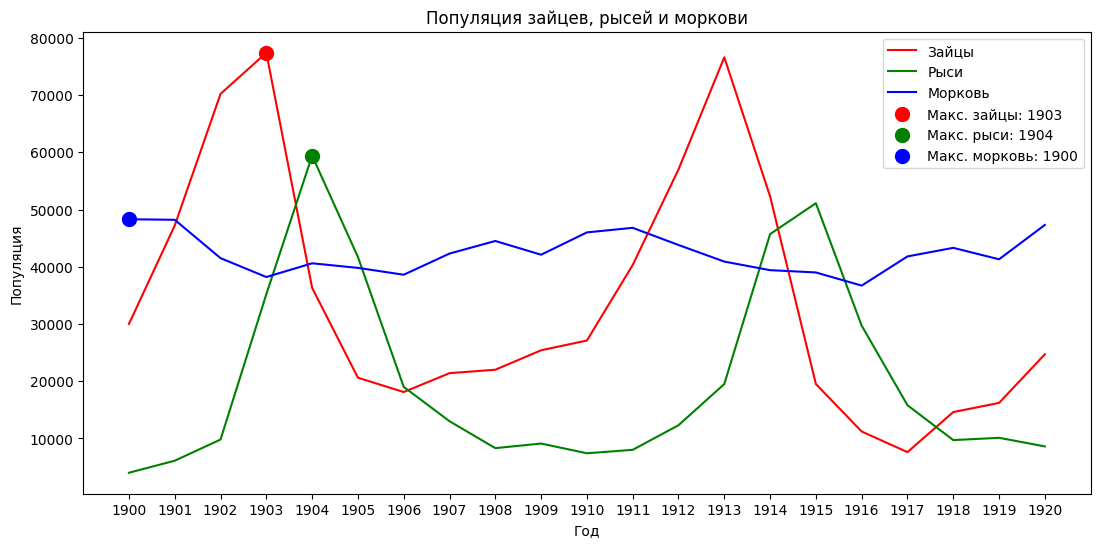

In [4]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('populations.txt', skiprows=1)

years = data[:, 0]
hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

plt.figure(figsize=(13, 6))
plt.xticks(years.astype(int))

# находим годы с максимальной популяцией для каждого вида
max_hares_index = np.argmax(hares)
max_lynxes_index = np.argmax(lynxes)
max_carrots_index = np.argmax(carrots)

max_hares_year = years[max_hares_index]
max_lynxes_year = years[max_lynxes_index]
max_carrots_year = years[max_carrots_index]

plt.plot(years, hares, label='Зайцы', color='r')
plt.plot(years, lynxes, label='Рыси', color='g')
plt.plot(years, carrots, label='Морковь', color='b')

# отмечаем годов с максимальной популяцией
plt.scatter(max_hares_year, hares[max_hares_index], color='r', marker='o', s=100, label=f'Макс. зайцы: {int(max_hares_year)}')
plt.scatter(max_lynxes_year, lynxes[max_lynxes_index], color='g', marker='o', s=100, label=f'Макс. рыси: {int(max_lynxes_year)}')
plt.scatter(max_carrots_year, carrots[max_carrots_index], color='b', marker='o', s=100, label=f'Макс. морковь: {int(max_carrots_year)}')

plt.legend()
plt.xlabel('Год')
plt.ylabel('Популяция')
plt.title('Популяция зайцев, рысей и моркови')

plt.show()


3)Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for each year in the period.

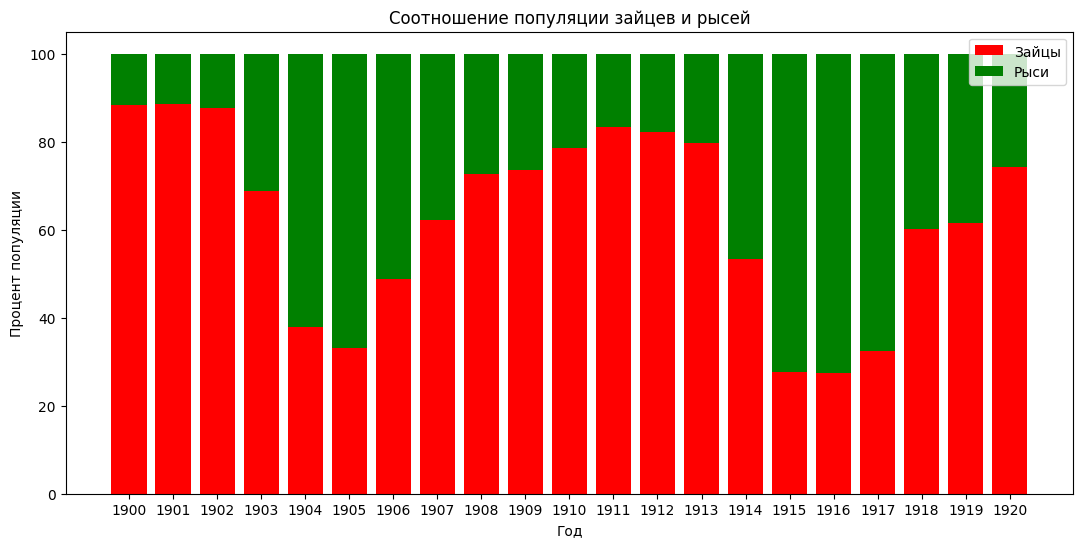

In [5]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('populations.txt', skiprows=1)

years = data[:, 0]
hares = data[:, 1]
lynxes = data[:, 2]


total_population = hares + lynxes # общая популяция

hares_ratio = hares / total_population * 100
lynxes_ratio = lynxes / total_population * 100

plt.figure(figsize=(13, 6))

plt.bar(years, hares_ratio, label='Зайцы', color='r')
plt.bar(years, lynxes_ratio, label='Рыси', color='g', bottom=hares_ratio)

plt.xlabel('Год')
plt.ylabel('Процент популяции')
plt.title('Соотношение популяции зайцев и рысей')
plt.legend()
plt.xticks(years.astype(int))

plt.show()


4)Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Show each histogram in a separate plot. Arrange 3 plots in a row.

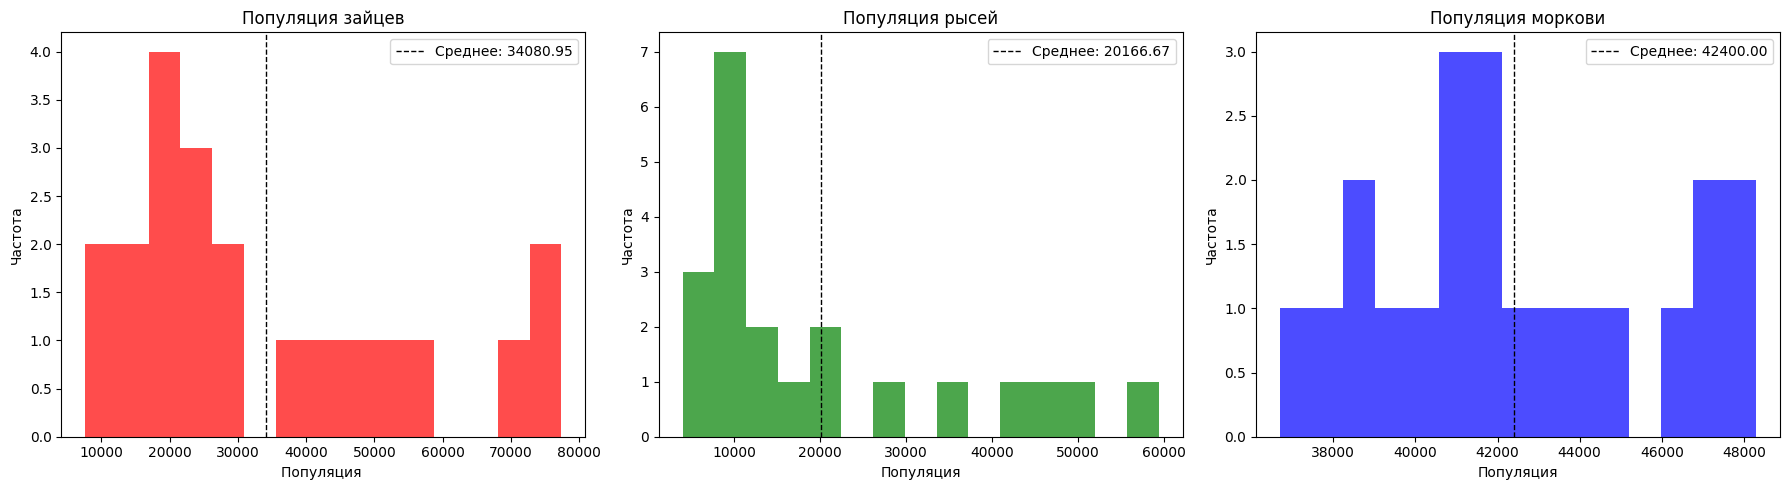

In [6]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('populations.txt', skiprows=1)

hares = data[:, 1]
lynxes = data[:, 2]
carrots = data[:, 3]

# среднее значение и стандартное отклонение
hares_mean = np.mean(hares)
hares_std = np.std(hares)

lynxes_mean = np.mean(lynxes)
lynxes_std = np.std(lynxes)

carrots_mean = np.mean(carrots)
carrots_std = np.std(carrots)

# создание подграфиков
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

axs[0].hist(hares, bins=15, color='r', alpha=0.7)
axs[0].axvline(hares_mean, color='k', linestyle='dashed', linewidth=1, label=f'Среднее: {hares_mean:.2f}')
axs[0].set_title('Популяция зайцев')
axs[0].set_xlabel('Популяция ')
axs[0].set_ylabel('Частота')
axs[0].legend()

axs[1].hist(lynxes, bins=15, color='g', alpha=0.7)
axs[1].axvline(lynxes_mean, color='k', linestyle='dashed', linewidth=1, label=f'Среднее: {lynxes_mean:.2f}')
axs[1].set_title('Популяция рысей')
axs[1].set_xlabel('Популяция')
axs[1].set_ylabel('Частота')
axs[1].legend()

axs[2].hist(carrots, bins=15, color='b', alpha=0.7)
axs[2].axvline(carrots_mean, color='k', linestyle='dashed', linewidth=1, label=f'Среднее: {carrots_mean:.2f}')
axs[2].set_title('Популяция моркови')
axs[2].set_xlabel('Популяция')
axs[2].set_ylabel('Частота')
axs[2].legend()

plt.tight_layout()
plt.show()

5)Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. Plot a pie chart showing the ratio of "H" and "L" values.

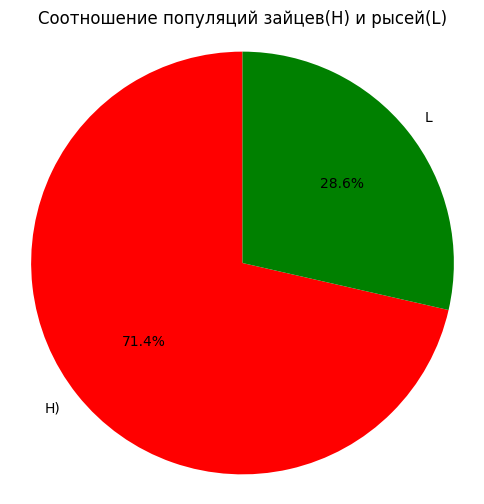

In [7]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('populations.txt', skiprows=1)

hares = data[:, 1]
lynxes = data[:, 2]

# какой вид имеет большую популяцию
populations = np.where(hares > lynxes, 'H', 'L')

# подсчет количества H и L
labels, counts = np.unique(populations, return_counts=True)

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
plt.title('Соотношение популяций зайцев(H) и рысей(L)')
plt.axis('equal')
plt.show()


6)Plot the change in the hare population and in the lynx population for each year. Find the correlation coefficient between the both time series.


Коэффициент корреляции между популяцией зайцев и рысей: 0.07189


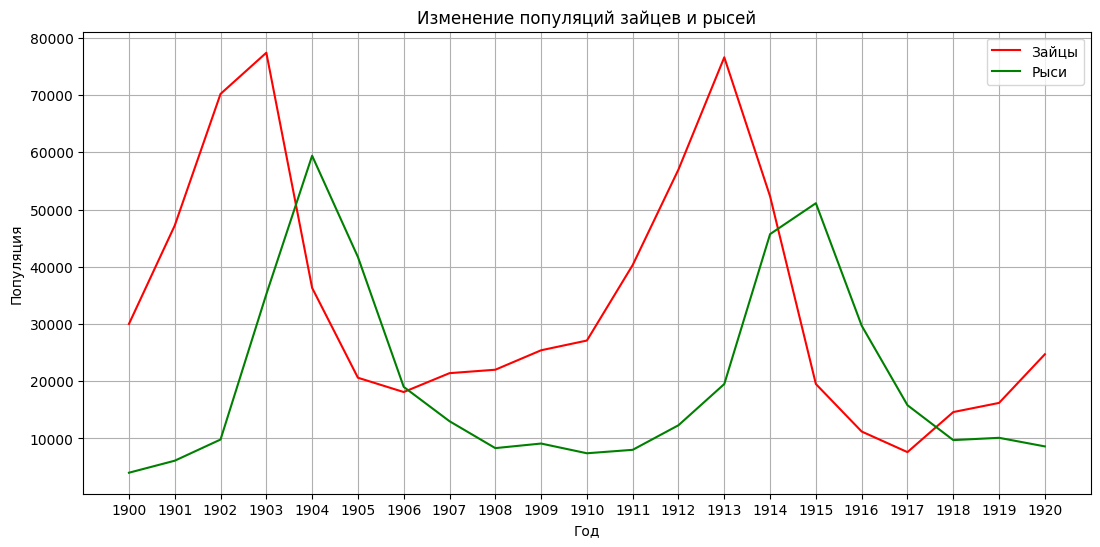

In [8]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('populations.txt', skiprows=1)

years = data[:, 0]
hares = data[:, 1]
lynxes = data[:, 2]

plt.figure(figsize = (13, 6))
plt.xticks(years.astype(int))

plt.plot(years, hares, label='Зайцы', color='red')
plt.plot(years, lynxes, label='Рыси', color='green')

plt.xlabel('Год')
plt.ylabel('Популяция')
plt.title('Изменение популяций зайцев и рысей')
plt.legend()
plt.grid()

# коэффициент корреляции
correlation_coefficient = np.corrcoef(hares, lynxes)[0, 1]
print(f'Коэффициент корреляции между популяцией зайцев и рысей: {correlation_coefficient:.5f}')

plt.show()


7)
Using a scatter plot, show the population of hares vs lynxes by year (each point corresponds to a particular year, and the point coordinates correspond to the population of the two species in that year).



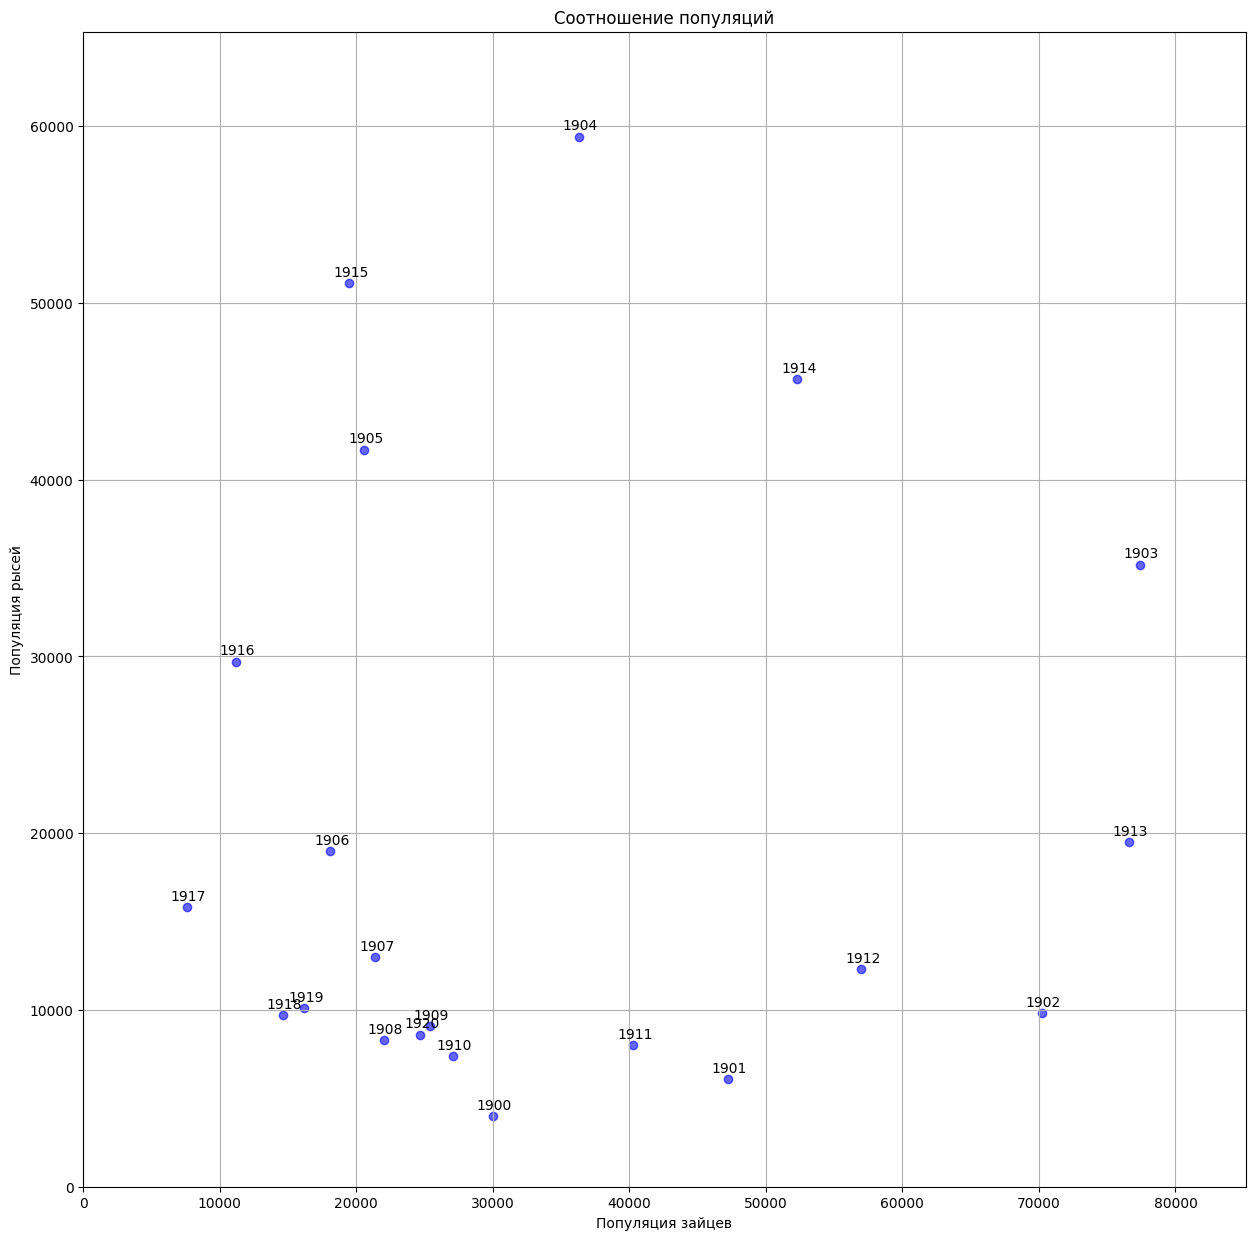

In [9]:
import numpy as np
import matplotlib.pyplot as plt

data = np.loadtxt('populations.txt', skiprows=1)

years = data[:, 0].astype(int)
hares = data[:, 1]
lynxes = data[:, 2]

plt.figure(figsize=(15, 15))

plt.scatter(hares, lynxes, color='blue', alpha=0.6)


for i in range(len(years)):
    plt.annotate(years[i], (hares[i], lynxes[i]), textcoords="offset points", xytext=(1, 5), ha='center')

plt.xlabel('Популяция зайцев')
plt.ylabel('Популяция рысей')
plt.title('Соотношение популяций')

plt.grid()

plt.xlim(0, max(hares)*1.1)
plt.ylim(0, max(lynxes)*1.1)

plt.show()


8)
Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value. Compare an estimated value with the true value and print a ratio of the error to the true value.



In [10]:
import numpy as np
from sklearn.linear_model import LinearRegression

data = np.loadtxt('populations.txt', skiprows=1)
years = data[:, 0].astype(int)
hares = data[:, 1]

# будем использовать модель линейной регрессии
model = LinearRegression()
model.fit(years.reshape(-1, 1), hares)

# предсказание для 1920 года
predicted_hares_1920 = model.predict(np.array([[1920]]))[0]

# истинное значение популяции зайцев в 1920 году
true_hares_1920 = 24.7e3

error = abs(predicted_hares_1920 - true_hares_1920)
error_ratio = error / true_hares_1920

print(f"Предсказанное значение популяции зайцев в 1920 году: {predicted_hares_1920:.2f}")
print(f"Истинное значение популяции зайцев в 1920 году: {true_hares_1920:.2f}")
print(f"Отношение ошибки к истинному значению: {error_ratio:.5f}")


Предсказанное значение популяции зайцев в 1920 году: 20649.78
Истинное значение популяции зайцев в 1920 году: 24700.00
Отношение ошибки к истинному значению: 0.16398


-не очень большая погрешность, предложенная модель подходит